# Practical Deep Learning for Coders [Part 1]

This is the first in hopefully a series of blog posts as cataloging my experiences as I make my way through fast.ai's course [Practical Deep Learning for Coders](https://course.fast.ai/).

The course encourages you to blog about it, so that's what I'm gonna do.

## Chapter 1

First things first, setting up an environment to play around in.

I'm mostly following the setup suggested in [this blog post](https://amytabb.com/ts/2020-09-19/) by Amy Tabb to set up a docker container with all the necessary tools to go through the book, and following along in a Jupyter Notebook. That's actually what I'm writing this in right now!

In [ ]:
#hide
import torch
from fastai.vision import *
from fastai.metrics import error_rate

The [Arch wiki](https://wiki.archlinux.org/title/docker#Run_GPU_accelerated_Docker_containers_with_NVIDIA_GPUs) came to my rescure in getting docker setup to use my GPU. I basically just followed it's direction and things worked.

The note at the top of that section is very important.

> Note: libnvidia-container has no support for cgroups v2. You need to set the systemd.unified_cgroup_hierarchy=false kernel parameter and set no-cgroups = false in /etc/nvidia-container-runtime/config.toml if you are using systemd v248 or higher.

In [ ]:
!/usr/bin/nvidia-smi

Sat Jan  1 20:10:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 495.46       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:2B:00.0  On |                  N/A |
| 13%   60C    P0    51W / 201W |   2034MiB /  4040MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
print("Is cuda available?", torch.cuda.is_available())
print("cuDNN enabled? ", torch.backends.cudnn.enabled)
print("cuDNN version:", torch.backends.cudnn.version())

Is cuda available? True
cuDNN enabled?  True
cuDNN version: 8200


### The Cat Detector

In [ ]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper()

In [ ]:
path = untar_data(URLs.PETS)/'images'
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

My poor GTX-970 with 4GB of memory does not enjoy being subjected to the rough treatment of training a model. As such instead of actually running that training code I'm just going to import the model I trained using Google Colab.

In [ ]:
learn = load_learner("cats.pkl")

Lets see if it can correctly identify one of my cats.

In [ ]:
#hide
from ipywidgets import widgets
uploader = widgets.FileUpload()
uploader

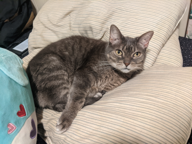

In [ ]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [ ]:
learn.predict(img)

('True', TensorBase(1), TensorBase([1.0175e-12, 1.0000e+00]))

Seems like it is 100% confident that this is a picture of a cat. What does it think about very _not_ a cat.

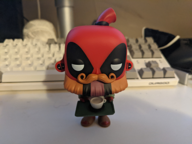

In [ ]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [ ]:
learn.predict(img)

('False', TensorBase(0), TensorBase([0.6000, 0.4000]))

Barista Deadpool is not a cat, although we're only 60% confident of that.

I'm going to keep this post pretty short, since most information in it wasn't new to me. The biggest new piece of new info to me was the practice of fine-tuning pre-trained networks instead of training them from scratch.

 > learn = cnn_learner(dls, ___resnet34___, metrics=error_rate)

`resnet34` is a network pre-trained network for image classification. By removing the later layer(s?) of the network that are tuned towards the original problem that the netork was trained on, we can replace them with a new layer that we use for the problem we're solving. This lets us leverage the underlying patterns for interpreting images that the network already learned and leverage them for our problem.

Very cool.

## Thoughts on the course so far

Too early to tell if the course is actually any good, but I like the direction it's heading. Learning without activly applying anything just doesn't work, at least not for me, so this style of teaching appeals to me.